In [1]:
import joblib
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt



In [2]:
#import training an stesting data
X_train = np.genfromtxt('X_train.csv', delimiter=',')
X_test = np.genfromtxt('X_test.csv', delimiter=',')
y_train = np.genfromtxt('y_train.csv', delimiter=',')
y_test = np.genfromtxt('y_test.csv', delimiter=',')
dates = pd.read_csv('dates.csv')
dates = dates.Date

dates.head()

0    2020-02-21 11:55:08
1    2020-07-16 17:06:05
2    2020-01-22 10:18:08
3    2020-05-14 12:24:11
4    2020-05-14 11:37:13
Name: Date, dtype: object

In [3]:
#import neural network
clf = joblib.load('mlp_reg_3.pkl')


In [4]:
#fit model
from sklearn.metrics import mean_squared_error, r2_score
y_pred = clf.predict(X_test)

y_test = (y_test/5)
y_pred = (y_pred/5)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

dates.dtypes

0.0007853665008824628
0.7816899765112242


dtype('O')

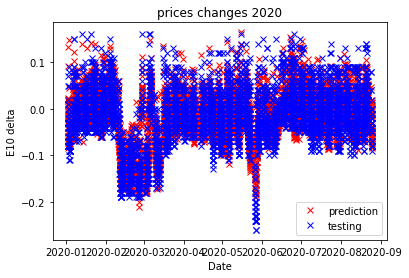

In [5]:
from matplotlib import dates as mdates
dates = pd.to_datetime(dates)

plt.plot_date(dates, y_pred, linestyle='None', marker='x', color='r', label='prediction')
plt.plot_date(dates, y_test, linestyle='None', marker='x', color='b', label='testing')
plt.title("prices changes 2020")
plt.xlabel("Date")
plt.ylabel("E10 delta")
plt.legend()
plt.show()

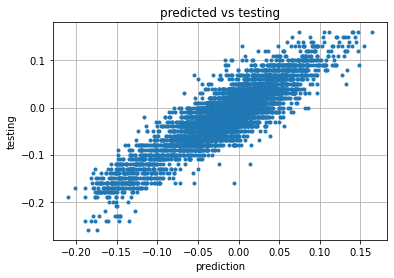

In [6]:
plt.plot(y_pred, y_test, linestyle='None', marker='.')
plt.title("predicted vs testing")
plt.xlabel("prediction")
plt.ylabel("testing")
plt.grid()
plt.show()

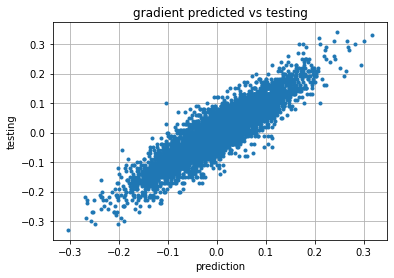

In [7]:
y_test_grad = np.zeros(len(y_test))
y_pred_grad = np.zeros(len(y_test))
for i in range(len(y_test)):
    y_test_grad[i] = y_test[i] - y_test[i-1]
    y_pred_grad[i] = y_pred[i] - y_pred[i-1]

plt.plot(y_pred_grad, y_test_grad, linestyle='None', marker='.')
plt.title("gradient predicted vs testing")
plt.xlabel("prediction")
plt.ylabel("testing")
plt.grid()
plt.show()

In [8]:
test = pd.read_csv('testdata.csv', names=['Date', 'UUID', 'Diesel', 'E5','E10','deltaE10','Oil','0','1','2','3','4','5','6','7'])
test.head()




,Date,UUID,Diesel,E5,E10,deltaE10,Oil,0,1,2,3,4,5,6,7
0,2020-09-22 05:47:15,0,1.019,1.289,1.249,0.00,1.379,1,0,0,0,0,0,0,0
1,2020-09-22 06:50:08,0,1.079,1.349,1.309,0.06,1.379,1,0,0,0,0,0,0,0
2,2020-09-22 07:25:07,0,1.019,1.289,1.249,0.00,1.379,1,0,0,0,0,0,0,0
3,2020-09-22 09:25:05,0,1.019,1.269,1.229,-0.02,1.379,1,0,0,0,0,0,0,0
4,2020-09-22 10:21:16,0,1.059,1.309,1.269,0.02,1.379,1,0,0,0,0,0,0,0


In [9]:
test['Date'] = pd.to_datetime(test.Date)
test['Year'] = (test.Date.dt.year / 2020)
test['Month'] = (test.Date.dt.month / 12)
test['Day'] = (test.Date.dt.day / 30)
test['Hour'] = (test.Date.dt.hour / 24)
test['Minute'] = (test.Date.dt.minute / 60)

test.head()


,Date,UUID,Diesel,E5,E10,deltaE10,Oil,0,1,2,3,4,5,6,7,Year,Month,Day,Hour,Minute
0,2020-09-22 05:47:15,0,1.019,1.289,1.249,0.00,1.379,1,0,0,0,0,0,0,0,1.0,0.75,0.733333,0.208333,0.783333
1,2020-09-22 06:50:08,0,1.079,1.349,1.309,0.06,1.379,1,0,0,0,0,0,0,0,1.0,0.75,0.733333,0.250000,0.833333
2,2020-09-22 07:25:07,0,1.019,1.289,1.249,0.00,1.379,1,0,0,0,0,0,0,0,1.0,0.75,0.733333,0.291667,0.416667
3,2020-09-22 09:25:05,0,1.019,1.269,1.229,-0.02,1.379,1,0,0,0,0,0,0,0,1.0,0.75,0.733333,0.375000,0.416667
4,2020-09-22 10:21:16,0,1.059,1.309,1.269,0.02,1.379,1,0,0,0,0,0,0,0,1.0,0.75,0.733333,0.416667,0.350000


In [10]:
from matplotlib import dates
data = test

test_dates = dates.date2num(data.Date)
#test_dates = data.Date
data = data.drop(['Date','Year', 'UUID', 'Diesel', 'E5', 'E10'], axis=1)

data.head(9)

,deltaE10,Oil,0,1,2,3,4,5,6,7,Month,Day,Hour,Minute
0,0.00,1.379,1,0,0,0,0,0,0,0,0.75,0.733333,0.208333,0.783333
1,0.06,1.379,1,0,0,0,0,0,0,0,0.75,0.733333,0.250000,0.833333
2,0.00,1.379,1,0,0,0,0,0,0,0,0.75,0.733333,0.291667,0.416667
3,-0.02,1.379,1,0,0,0,0,0,0,0,0.75,0.733333,0.375000,0.416667
4,0.02,1.379,1,0,0,0,0,0,0,0,0.75,0.733333,0.416667,0.350000
5,-0.04,1.379,1,0,0,0,0,0,0,0,0.75,0.733333,0.416667,0.933333
6,-0.04,1.379,1,0,0,0,0,0,0,0,0.75,0.733333,0.500000,0.666667
7,0.00,1.379,1,0,0,0,0,0,0,0,0.75,0.733333,0.541667,0.350000
8,-0.04,1.379,1,0,0,0,0,0,0,0,0.75,0.733333,0.541667,0.933333


In [11]:
from sklearn.preprocessing import StandardScaler

y = data.deltaE10
X = data.drop(['deltaE10'], axis=1)
scaler = StandardScaler().fit(X)
X = scaler.transform(X)


In [12]:
y_val = clf.predict(X)
y_val = (y_val/5)

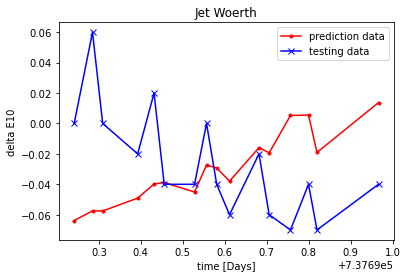

In [15]:
plt.plot(test_dates, y_val, marker='.', color='r', label='prediction data')
plt.plot(test_dates, y, marker='x', color='b', label='testing data')
plt.title("Jet Woerth 22.09.2020")
plt.xlabel("time [Days]")
plt.ylabel("delta E10")
plt.legend()
plt.show()